In [1]:
#import all libreries
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from termcolor import colored

from collections import Counter
import re
import nltk

# Now you can use the Counter class
my_list = [1, 2, 2, 3, 3, 3, 4, 4, 4, 4]
counter = Counter(my_list)
print(counter)



from nltk.tokenize import RegexpTokenizer
import contractions

from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
from nltk.tokenize import word_tokenize
nltk.download('wordnet')

Counter({4: 4, 3: 3, 2: 2, 1: 1})


[nltk_data] Downloading package stopwords to C:\Users\Azmeera
[nltk_data]     Pavan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Azmeera
[nltk_data]     Pavan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
from nltk.stem import WordNetLemmatizer, SnowballStemmer
stemmer = SnowballStemmer("english")

from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, roc_auc_score, average_precision_score, precision_recall_curve
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_extraction.text import CountVectorizer
import warnings 
warnings.filterwarnings("ignore")


In [3]:
df=pd.read_csv(r"C:\amazon_review_polarity_csv\train.csv",header=None)


In [4]:
df.columns=['Rating','Title','Review']
df.head(10)

,Rating,Title,Review
0,2,Stuning even for the non-gamer,This sound track was beautiful! It paints the ...
1,2,The best soundtrack ever to anything.,I'm reading a lot of reviews saying that this ...
2,2,Amazing!,This soundtrack is my favorite music of all ti...
3,2,Excellent Soundtrack,I truly like this soundtrack and I enjoy video...
4,2,"Remember, Pull Your Jaw Off The Floor After He...","If you've played the game, you know how divine..."
5,2,an absolute masterpiece,I am quite sure any of you actually taking the...
6,1,Buyer beware,"This is a self-published book, and if you want..."
7,2,Glorious story,I loved Whisper of the wicked saints. The stor...
8,2,A FIVE STAR BOOK,I just finished reading Whisper of the Wicked ...
9,2,Whispers of the Wicked Saints,This was a easy to read book that made me want...


In [5]:
df.shape

(3600000, 3)

# clean and processing data

In [6]:
#random sample function:
def random_sample(data):
    return data.sample(frac=0.025)

In [7]:
df=random_sample(df)
df.shape

(90000, 3)

In [8]:
df=df[['Rating','Review']].reset_index(drop=True)

In [9]:
def decrease_label_by_one(label):
    return label-1
df['Rating']=df['Rating'].apply(decrease_label_by_one)

In [10]:
df.head(5)

,Rating,Review
0,1,I lost one many moons ago. I love this song! I...
1,1,The castanets I purchased are of a good qualit...
2,0,I have read Alan Watts now for many years. I u...
3,0,This book was very hard to understand. There w...
4,1,Not as well as Morton's or especially not as w...


In [11]:
df.Rating.value_counts(normalize=True)

0    0.500533
1    0.499467
Name: Rating, dtype: float64

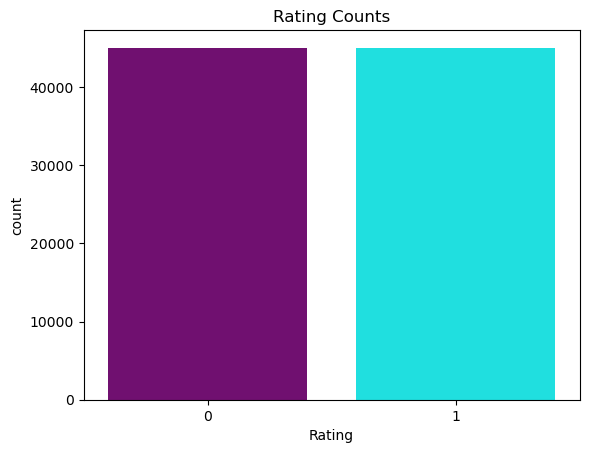

In [12]:
color_palette=['purple','cyan']
sns.set_palette(color_palette)
sns.countplot(x=df['Rating'])
plt.title('Rating Counts')
plt.show()

In [13]:
df.isnull().sum()

Rating    0
Review    0
dtype: int64

#processing data
code explore :text cleaning

In [14]:
def preprocess_text(text):
    text=re.sub(r'[\W_]+',' ',contractions.fix(re.sub(r'\d+','',text.replace(' s ',' ')))).lower()
    
    #stopword removal
    
    
    tokens=nltk.word_tokenize(text)
    text= ' '.join([token for token in tokens if token not in stop_words])
    
    
    #data normalization
    
    normalized_text=[stemmer.stem(word) for word in text.split()]
    
    text=' '.join(normalized_text)
    
    
    return text

In [15]:
print(colored('Before of clean:\n','blue'),df.Review[8])

Before of clean:
 To be blunt: it sucks. VERY inefficient, as in, slow to heat even a small-ish bedroom. Takes forever. And, my first one died completely with only 2 seasons of usage. And not economical at all - at least where I live. Boo, hiss.


In [16]:
print(colored('After of clean:\n', 'blue'),preprocess_text(df.Review[8]))

After of clean:
 blunt suck ineffici slow heat even small ish bedroom take forev first one die complet season usag econom least live boo hiss


In [17]:
df['Review']=df['Review'].apply(preprocess_text)
df.head(5)

,Rating,Review
0,1,lost one mani moon ago love song happi abl fin...
1,1,castanet purchas good qualiti least insturctor...
2,0,read alan watt mani year use listen pbs berkel...
3,0,book hard understand mani word word clutter re...
4,1,well morton especi well flavacol work fair ver...


Exploration Data analysis(EDa


In [18]:
#frequecy words

words= Counter(' '.join(df['Review'].to_list()).split())


frequency_words=pd.DataFrame([words]).transpose().reset_index().rename(columns={'index':'Words',0:'Frequency'})

frequency_words=frequency_words.sort_values('Frequency',ascending=False).reset_index(drop='index').reset_index().rename(columns={'index':'Rank'})

frequency_words['Rank']=frequency_words['Rank'].apply(lambda x : x+1)

frequency_words.head(20)

,Rank,Words,Frequency
0,1,book,51840
1,2,one,34298
2,3,like,27923
3,4,would,25074
4,5,read,22436
5,6,use,21780
6,7,good,21505
7,8,get,21359
8,9,time,20208
9,10,great,19996


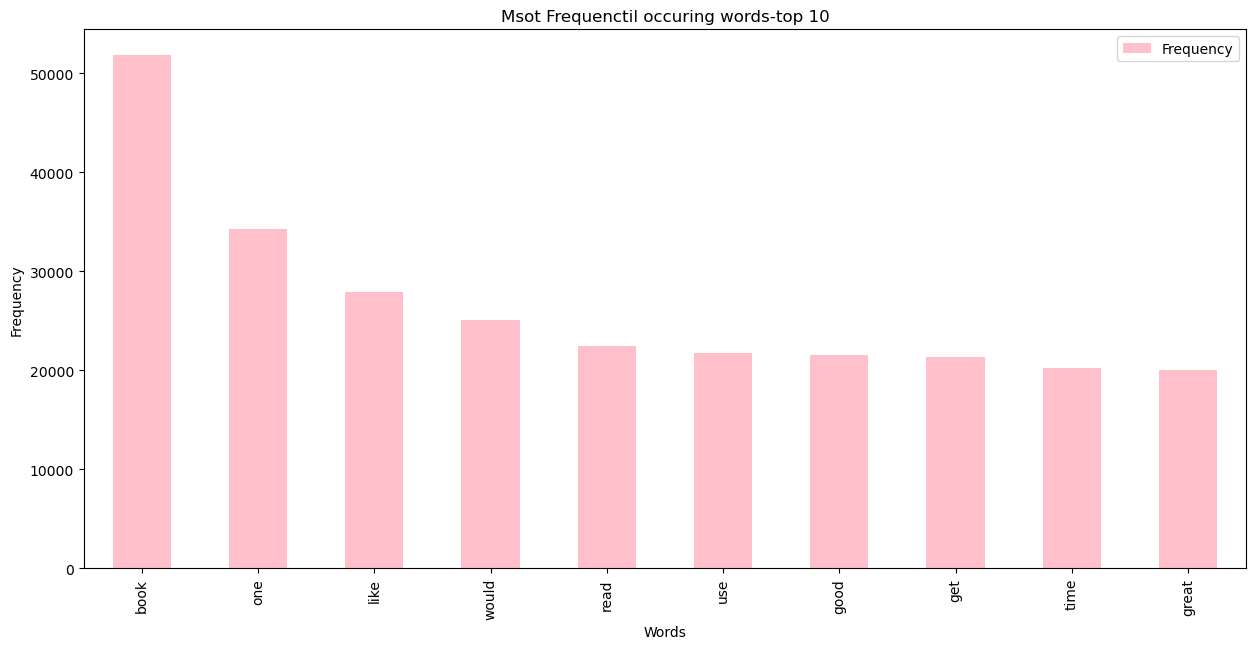

In [19]:
top10=frequency_words[['Words','Frequency']].head(10)
top10.plot(x='Words',y='Frequency',kind='bar',figsize=(15,7),color='pink')
plt.title('Msot Frequenctil occuring words-top 10')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()

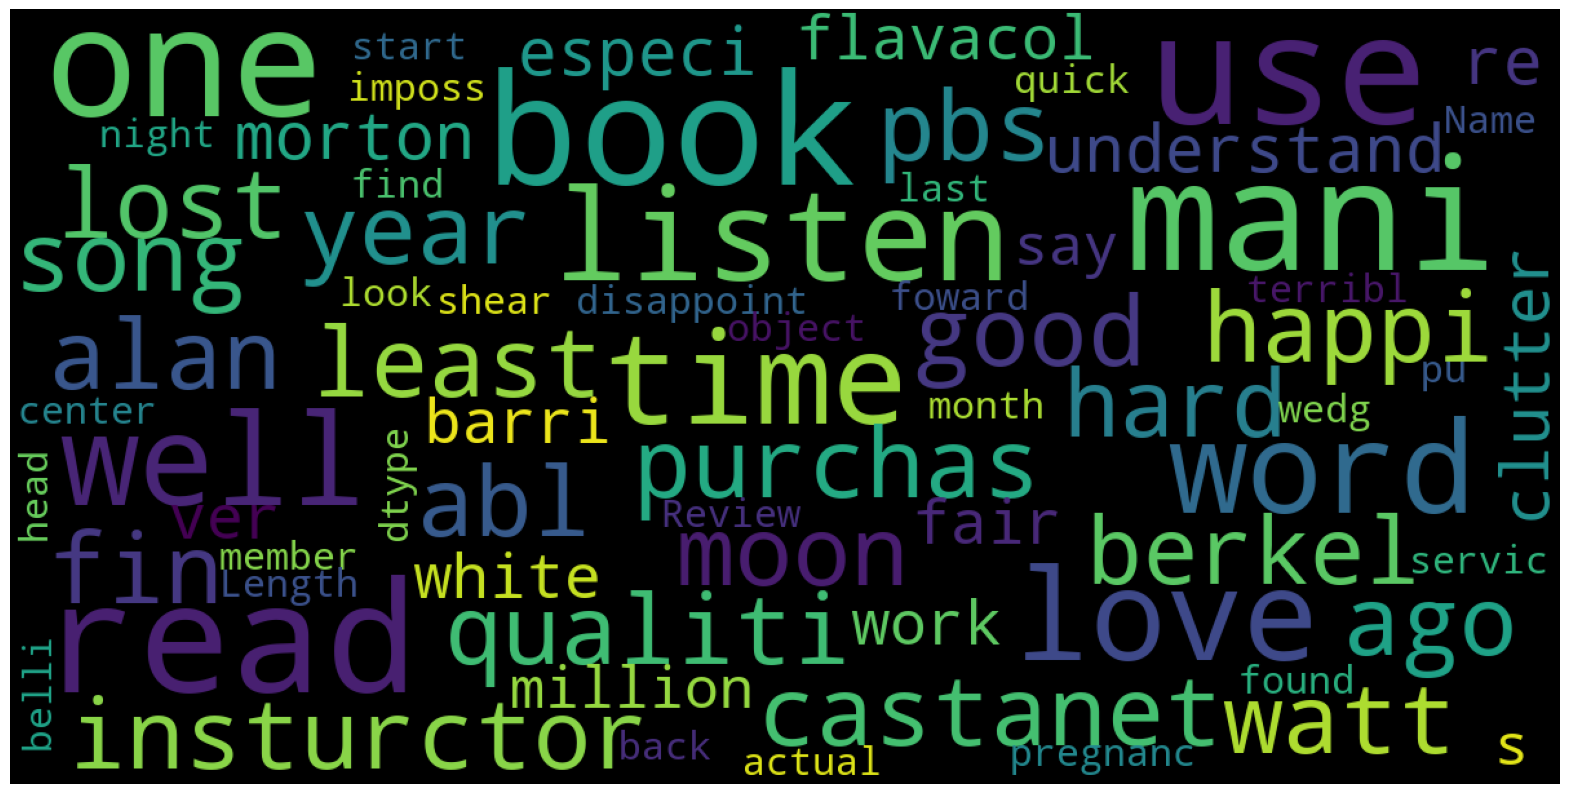

In [20]:
from wordcloud import WordCloud
#wordcolud chart

def show_wordcloud(data,title=None):
    wordcloud=WordCloud(background_color='black',max_words=350,max_font_size=40,scale=3,random_state=42).generate(str(data))
    fig=plt.figure(1,figsize=(20,20))
    plt.axis('off')
    if title:
        fig.subtitle(title,fontsize=20)
        fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df['Review'])

# feature Extraction

In [21]:
Tf=TfidfVectorizer(max_features=2000,ngram_range=(1,3),analyzer='char')
Tf


TfidfVectorizer(analyzer='char', max_features=2000, ngram_range=(1, 3))

In [22]:
X=Tf.fit_transform(df['Review'])
y=df['Rating']

# train-test-split

In [23]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=123)

# Fitting and train ML models

In [24]:
#train a logistic Regression Model on the Training Data

lr=LogisticRegression(max_iter=5000)
#define the preprocessing step for numeric freatures 

lr.fit(X_train,y_train)

LogisticRegression(max_iter=5000)

In [25]:
lr_preds=lr.predict(X_test)

lr_accuracy=accuracy_score(y_test,lr_preds)*100

print(f'Accuracy of Linear Regression Model:{lr_accuracy:.2f}%')

Accuracy of Linear Regression Model:80.47%


In [26]:
#Train a  SVC linear Model on the Training Data

In [27]:
svm = LinearSVC()

# Define the preprocessing steps for numeric features
svm.fit(X_train, y_train)

# Predict the ratings for the test set
svm_preds = svm.predict(X_test)

# Evaluate the accuracy of the model
svm_accuracy = accuracy_score(y_test, svm_preds)*100
print(f"Accuracy of SVM Model: {svm_accuracy:.2f}%")

Accuracy of SVM Model: 81.19%


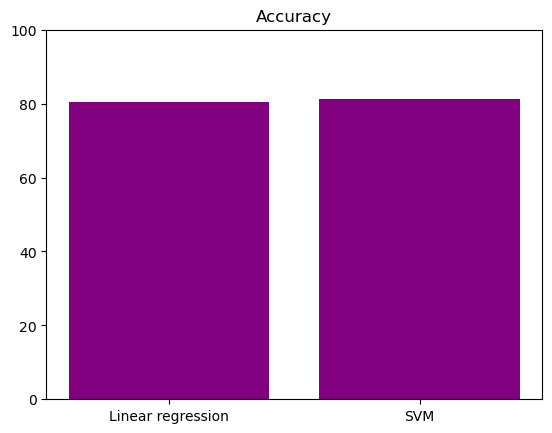

In [28]:
models=['Linear regression','SVM']
accuracy =[lr_accuracy,svm_accuracy]
plt.bar(models,accuracy)
plt.title('Accuracy')
plt.ylim(0,100)
plt.show()

In [29]:
def plot_precision_recall_curve(y_true,y_scores,model_name):
    average_precision=average_precision_score(y_true,y_scores)
    precision,recall, _ =precision_recall_curve(y_true,y_scores)
    
    
    plt.plot(recall,precision,lw=2,color='navy',label='Precision-Recall Curve')
    
    plt.fill_between(recall,precision,alpha=0.2,color='navy')
    
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0,1.05])
    plt.xlim([0.0,1.0])
    plt.title(f'Precision-Recall Curve of {model_name}:AP={average_precision:.2f}')
    plt.legend(loc='lower left')
    plt.show()

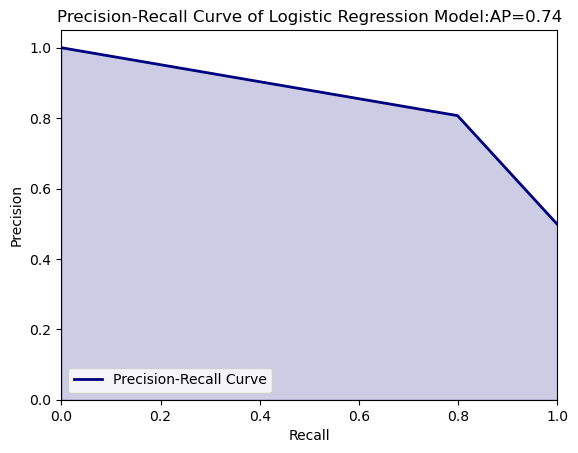

In [30]:
plot_precision_recall_curve(y_test,lr_preds,'Logistic Regression Model')

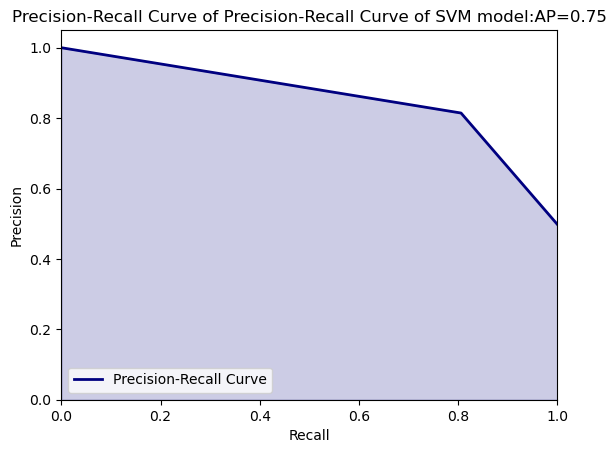

In [31]:
plot_precision_recall_curve(y_test,svm_preds,'Precision-Recall Curve of SVM model')

In [32]:
print(classification_report(y_test,lr_preds))
print(classification_report(y_test,svm_preds))

              precision    recall  f1-score   support

           0       0.80      0.81      0.81      9038
           1       0.81      0.80      0.80      8962

    accuracy                           0.80     18000
   macro avg       0.80      0.80      0.80     18000
weighted avg       0.80      0.80      0.80     18000

              precision    recall  f1-score   support

           0       0.81      0.82      0.81      9038
           1       0.81      0.81      0.81      8962

    accuracy                           0.81     18000
   macro avg       0.81      0.81      0.81     18000
weighted avg       0.81      0.81      0.81     18000



In [33]:
def predict_sentiment(comment, vectorizer, model):
    vectorizer = CountVectorizer()
    vec = vectorizer.transform([comment])
    prediction = model.predict(vec)
    
    if prediction == 0:
        print(colored("Negative", "red"))
    else:
        print(colored("Positive", "blue"))

In [34]:

x='Lousy product. The quality is very low.'
predict_sentiment(x,Tf,svm)

Negative


In [36]:
x='bad app'
predict_sentiment(x,Tf,svm)

Negative
